In [ ]:
# pip install pandas numpy scikit-learn matplotlib seaborn

#Please upload the training and testing csv files and uncomment
#the code pip command before running the notebook


###Importing libraries

In [ ]:
# Import necessary libraries for data handling, machine learning models, and visualization
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
from sklearn.tree import DecisionTreeClassifier  # decision tree classifier
from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.svm import SVC  # support vector machine classifier
from sklearn.decomposition import PCA  # principal component analysis for dimensionality reduction
from sklearn.metrics import confusion_matrix, accuracy_score  # to evaluate models
import matplotlib.pyplot as plt  # for plotting results
from sklearn.metrics import ConfusionMatrixDisplay # to display confusion matrix
import seaborn as sns  # for enhanced visualizations
from sklearn.tree import plot_tree # to display decision tree

###Reading training and testing datasets

In [ ]:
USER='samarthsingh'
FILE_PATH=''#"file:///Users/{}/Downloads/".format(USER)

# Load training and testing datasets
train_data = pd.read_csv(FILE_PATH+'TrainingData.csv')# load training data
test_data = pd.read_csv(FILE_PATH+'TestingData.csv')# load testing data

###Preparing datasets

In [ ]:


# Separate features (X) and labels (y) for training and testing data
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]  # features and labels from training set
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]  # features and labels from testing set
# Helper function to calculate type 1 and type 2 errors for model predictions
def calculate_errors(y_true, y_pred):
    # Generate a confusion matrix to classify outcomes
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    # Calculate type 1 error (False Positive Rate)
    type_1_error = cm[0, 1] / 200
    # Calculate type 2 error (False Negative Rate)
    type_2_error = cm[1, 0] / 200
    # Return type 1 and type 2 errors as a tuple
    return type_1_error, type_2_error

#### **Part 1: Classifiers using original features**

#### 1. Linear Discriminant Analysis (LDA)


--- Linear Discriminant Analysis (LDA) ---
LDA Accuracy: 0.91
LDA Type 1 Error: 0.16, Type 2 Error: 0.03


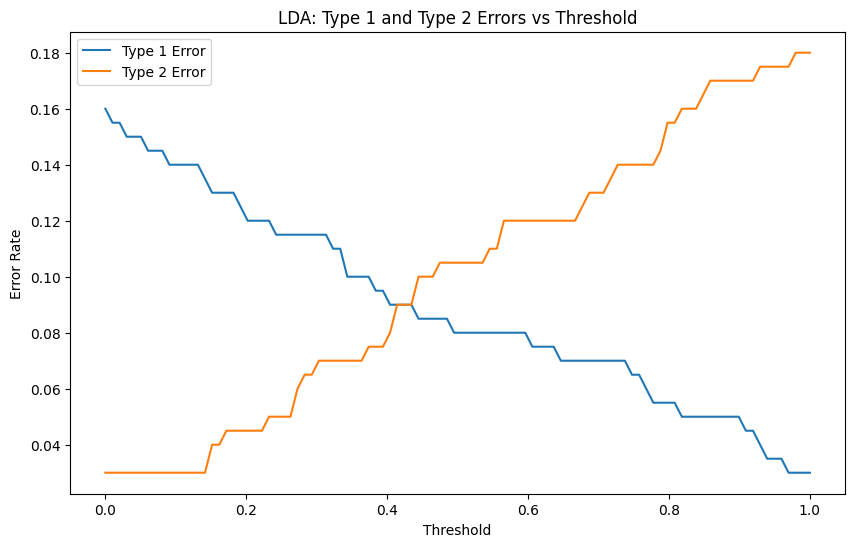

In [ ]:



print("\n--- Linear Discriminant Analysis (LDA) ---")
lda = LinearDiscriminantAnalysis()  # initialize LDA classifier
lda.fit(X_train, y_train)  # train LDA on training data
y_pred_lda = lda.predict(X_test)  # predict on testing data using trained LDA model
type_1_lda, type_2_lda = calculate_errors(y_test, y_pred_lda)  # calculate type 1 and type 2 errors for LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)  # calculate accuracy of LDA
print(f"LDA Accuracy: {accuracy_lda:.2f}")  # print LDA accuracy
print(f"LDA Type 1 Error: {type_1_lda:.2f}, Type 2 Error: {type_2_lda:.2f}")  # print type 1 and type 2 errors for LDA

# Plotting type 1 and type 2 errors for LDA with different thresholds
thresholds = np.linspace(y_pred_lda.min(), y_pred_lda.max(), 100)  # define threshold range for LDA
type1_errors = []  # initialize list to store type 1 errors
type2_errors = []  # initialize list to store type 2 errors

# Loop through each threshold and calculate type 1 and type 2 errors
for threshold in thresholds:
    # Predict using threshold for classification
    y_pred_thresh = (lda.decision_function(X_test) > threshold).astype(int)
    # Calculate errors for current threshold and append to respective lists
    type_1, type_2 = calculate_errors(y_test, y_pred_thresh)
    type1_errors.append(type_1)
    type2_errors.append(type_2)

# Plot type 1 and type 2 errors against varying threshold values
plt.figure(figsize=(10, 6))  # set figure size
plt.plot(thresholds, type1_errors, label='Type 1 Error')  # plot type 1 error
plt.plot(thresholds, type2_errors, label='Type 2 Error')  # plot type 2 error
plt.xlabel('Threshold')  # label x-axis
plt.ylabel('Error Rate')  # label y-axis
plt.title('LDA: Type 1 and Type 2 Errors vs Threshold')  # set title for the plot
plt.legend()  # display legend
plt.show()  # render plot

#### 2. Decision Tree Classifier


--- Decision Tree Classifier ---
Decision Tree Accuracy: 0.83
Decision Tree Type 1 Error: 0.17, Type 2 Error: 0.17


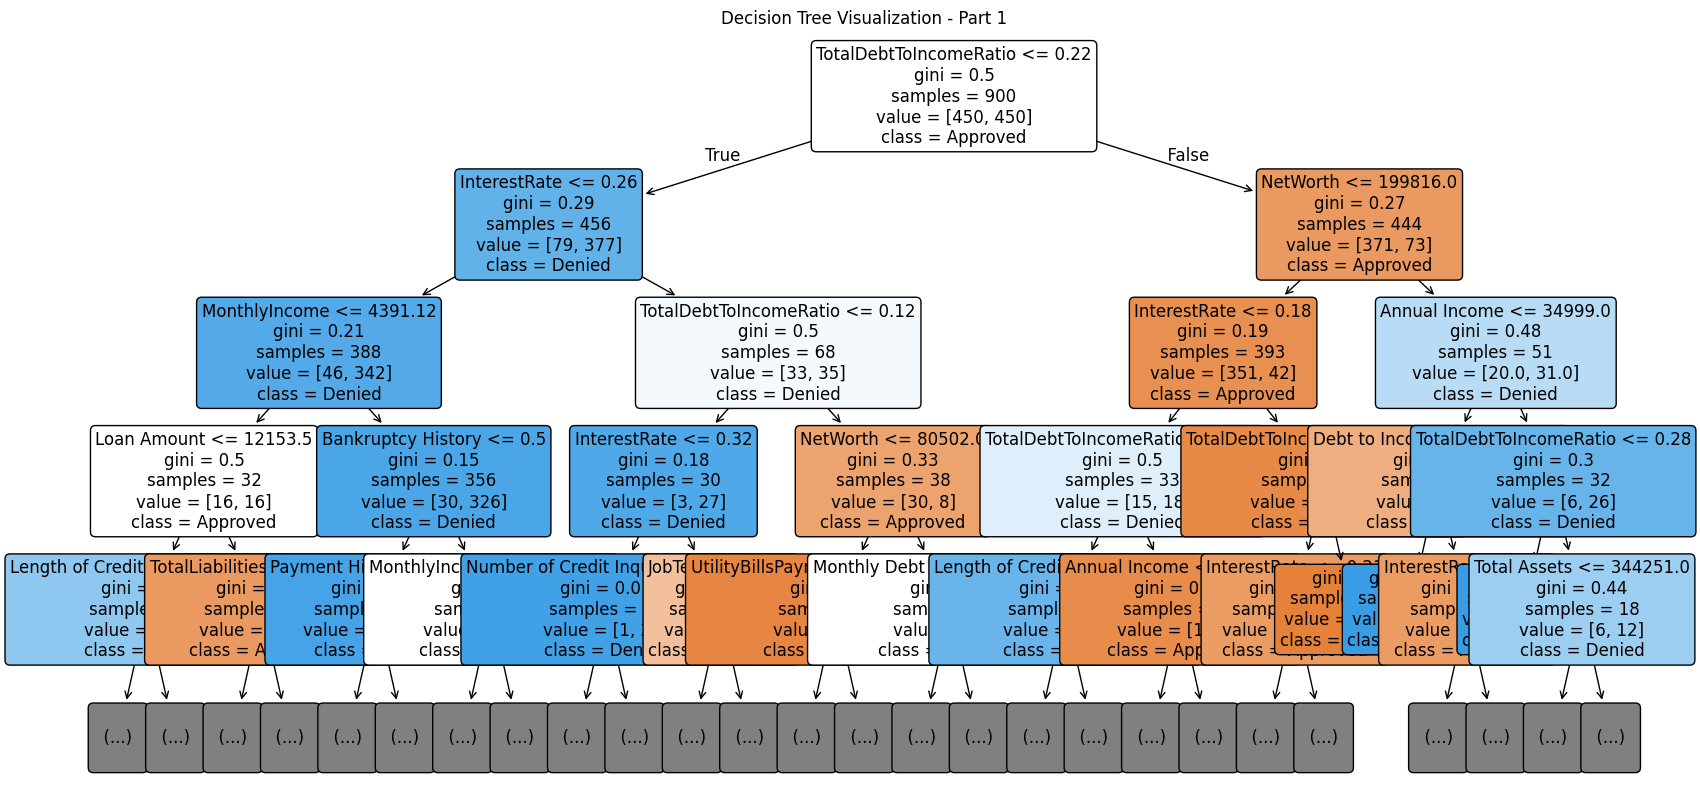

In [ ]:

print("\n--- Decision Tree Classifier ---")
tree = DecisionTreeClassifier(criterion='gini', splitter='best')  # 'gini' specifies CART algorithm
tree.fit(X_train, y_train)  # train decision tree on training data
y_pred_tree = tree.predict(X_test)  # predict on testing data using trained decision tree
type_1_tree, type_2_tree = calculate_errors(y_test, y_pred_tree)  # calculate type 1 and type 2 errors for decision tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)  # calculate accuracy of decision tree
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")  # print decision tree accuracy
print(f"Decision Tree Type 1 Error: {type_1_tree:.2f}, Type 2 Error: {type_2_tree:.2f}")  # print errors for decision tree

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))  # Set figure size for better readability
plot_tree(
    tree,
    feature_names=X_train.columns,  # Replace with actual feature names if available
    class_names=['Approved', 'Denied'],  # Replace with actual class names if available
    filled=True,  # Fill nodes with color to represent class distribution
    rounded=True,  # Rounded edges for better visuals
    max_depth=4,  # Limit depth for a cleaner visualization
    precision=2,  # Limit decimal places for Gini, samples, and value
    fontsize=12  # Increase font size for readability
)
plt.title("Decision Tree Visualization - Part 1")  # Title for the plot
plt.show()  # Display the tree

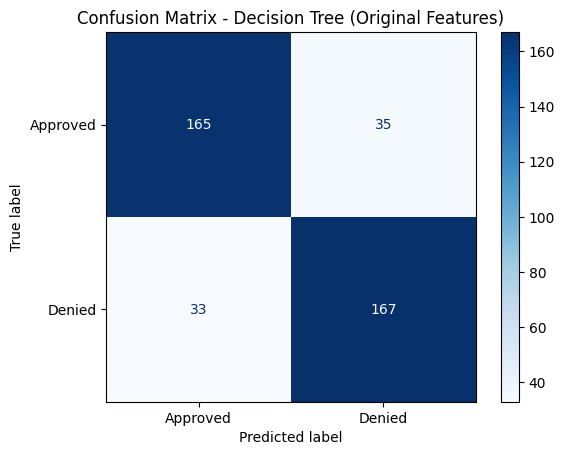

<ipython-input-7-5799b4f6157c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')  # 'viridis' provides a color gradient for better visibility


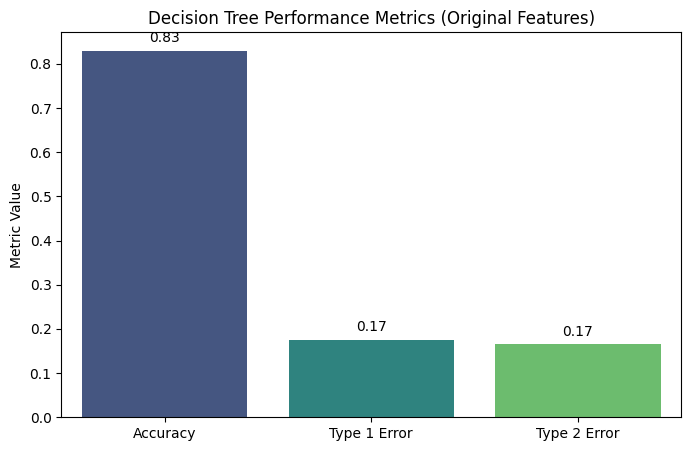

In [ ]:

ConfusionMatrixDisplay.from_estimator(
    tree,  # the trained Decision Tree classifier
    X_test,  # testing feature set
    y_test,  # actual labels for the test set
    display_labels=['Approved', 'Denied'],  # custom labels for confusion matrix
    cmap='Blues'  # color scheme for the matrix
)
# Set title for the confusion matrix plot to describe the classifier and feature set used
plt.title("Confusion Matrix - Decision Tree (Original Features)")
# Display the confusion matrix plot
plt.show()

# Bar plot to visualize accuracy, type 1 error, and type 2 error for Decision Tree
# Define metric labels as a list for the x-axis of the bar plot
metrics = ['Accuracy', 'Type 1 Error', 'Type 2 Error']
# Define the values of the metrics obtained for Decision Tree classifier on test data
values = [accuracy_tree, type_1_tree, type_2_tree]

# Create a new figure for the bar plot with defined size
plt.figure(figsize=(8, 5))
# Create a bar plot with the metric labels on the x-axis and their corresponding values on the y-axis
sns.barplot(x=metrics, y=values, palette='viridis')  # 'viridis' provides a color gradient for better visibility
# Set the title of the plot to reflect the classifier and feature set
plt.title("Decision Tree Performance Metrics (Original Features)")
# Label the y-axis to indicate what the values represent
plt.ylabel("Metric Value")
# Display values on top of each bar
for i, v in enumerate(values):  # Loop through each bar's index and value
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')  # Position text slightly above each bar
# Display the bar plot
plt.show()

### 3. k-Nearest Neighbors for k = 1, 3, 5, 10

In [ ]:

print("\n--- k-Nearest Neighbors (kNN) ---")
knn_results = {}  # dictionary to store results for each k value
# Loop over specified values of k
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)  # initialize kNN classifier with current k value
    knn.fit(X_train, y_train)  # train kNN on training data
    y_pred_knn = knn.predict(X_test)  # predict on testing data
    type_1_knn, type_2_knn = calculate_errors(y_test, y_pred_knn)  # calculate type 1 and type 2 errors
    accuracy_knn = accuracy_score(y_test, y_pred_knn)  # calculate kNN accuracy
    knn_results[k] = (type_1_knn, type_2_knn, accuracy_knn)  # store errors and accuracy in results dictionary
    print(f"k={k}: Accuracy={accuracy_knn:.2f}, Type 1 Error={type_1_knn:.2f}, Type 2 Error={type_2_knn:.2f}")  # print results


--- k-Nearest Neighbors (kNN) ---
k=1: Accuracy=0.78, Type 1 Error=0.25, Type 2 Error=0.18
k=3: Accuracy=0.82, Type 1 Error=0.18, Type 2 Error=0.17
k=5: Accuracy=0.83, Type 1 Error=0.20, Type 2 Error=0.14
k=10: Accuracy=0.83, Type 1 Error=0.17, Type 2 Error=0.17


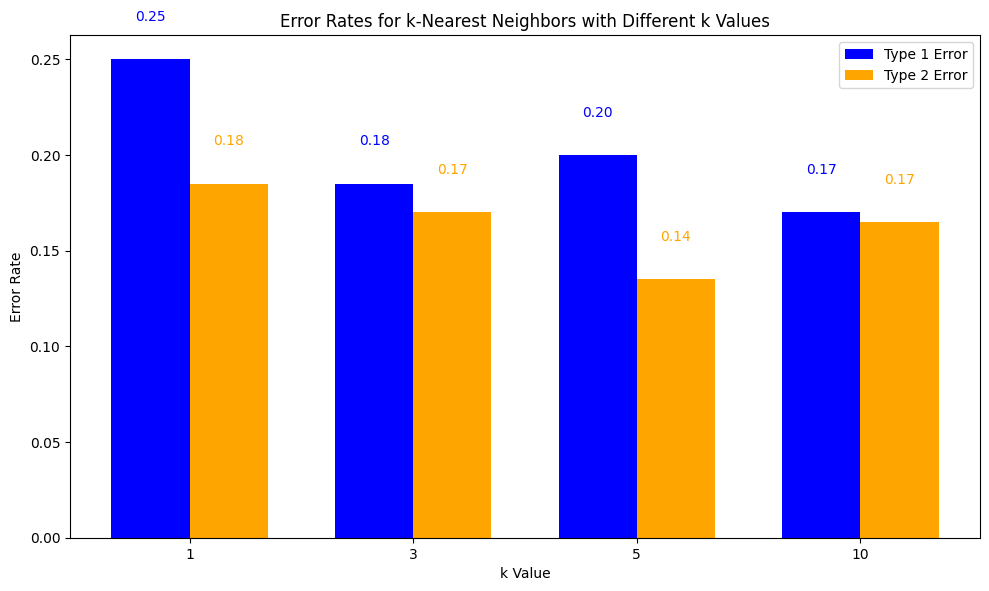

In [ ]:


# Extract the values from the knn_results dictionary
k_values = list(knn_results.keys())  # List of k values
type_1_errors = [knn_results[k][0] for k in k_values]  # Type 1 errors for each k
type_2_errors = [knn_results[k][1] for k in k_values]  # Type 2 errors for each k

# Set the width of each bar
bar_width = 0.35  # Width of each bar

# Set up the positions for the bars
r1 = np.arange(len(k_values))  # Position for type 1 errors
r2 = [x + bar_width for x in r1]  # Position for type 2 errors

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(r1, type_1_errors, color='blue', width=bar_width, label='Type 1 Error')  # Plot type 1 errors
plt.bar(r2, type_2_errors, color='orange', width=bar_width, label='Type 2 Error')  # Plot type 2 errors

# Adding labels and title
plt.xlabel('k Value')  # X-axis label
plt.ylabel('Error Rate')  # Y-axis label
plt.title('Error Rates for k-Nearest Neighbors with Different k Values')  # Plot title
plt.xticks([r + bar_width / 2 for r in r1], k_values)  # Set the position of x-ticks and labels

# Add a legend to differentiate between Type 1 and Type 2 errors
plt.legend()

# Display the values above each bar
for i, (t1, t2) in enumerate(zip(type_1_errors, type_2_errors)):
    plt.text(r1[i], t1 + 0.02, f"{t1:.2f}", ha='center', color='blue')  # Type 1 error values
    plt.text(r2[i], t2 + 0.02, f"{t2:.2f}", ha='center', color='orange')  # Type 2 error values

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


#### 4. Support Vector Machine (SVM) with Soft Margin

In [ ]:

print("\n--- Support Vector Machine (SVM) ---")
svm = SVC(kernel='linear', C=1)  # initialize SVM with linear kernel and soft margin
svm.fit(X_train, y_train)  # train SVM on training data
y_pred_svm = svm.predict(X_test)  # predict on testing data
type_1_svm, type_2_svm = calculate_errors(y_test, y_pred_svm)  # calculate type 1 and type 2 errors for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # calculate SVM accuracy
print(f"SVM Accuracy: {accuracy_svm:.2f}")  # print SVM accuracy
print(f"SVM Type 1 Error: {type_1_svm:.2f}, Type 2 Error: {type_2_svm:.2f}")  # print errors for SVM





--- Support Vector Machine (SVM) ---
SVM Accuracy: 0.87
SVM Type 1 Error: 0.20, Type 2 Error: 0.07


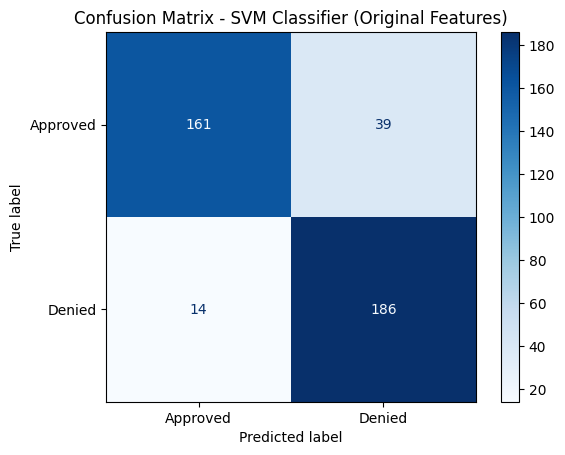

<ipython-input-11-45e489ac3398>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')  # 'viridis' palette provides color gradient for better visibility


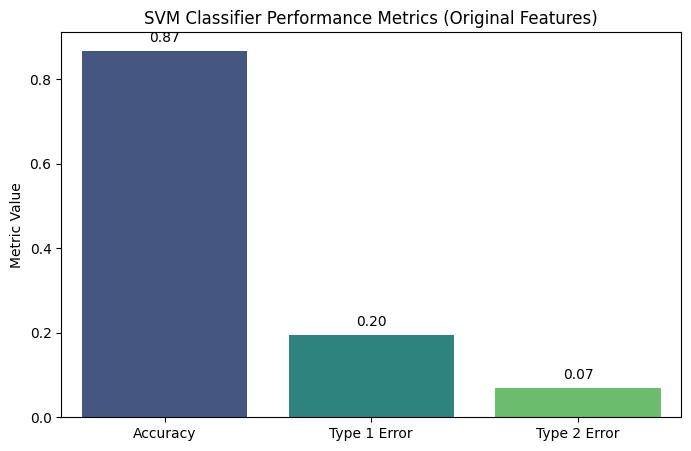

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test,  # actual labels from the test set
    y_pred_svm,  # predictions made by the SVM classifier on the test set
    display_labels=['Approved', 'Denied'],  # custom labels for each class (Approved and Denied)
    cmap='Blues'  # color scheme for better visual distinction in the matrix
)
# Set the title of the confusion matrix plot to describe the classifier and feature set used
plt.title("Confusion Matrix - SVM Classifier (Original Features)")
# Display the confusion matrix plot
plt.show()

# Step 2: Bar plot to visualize accuracy, type 1 error, and type 2 error for the SVM classifier
# Define the metric labels as a list to display on the x-axis of the bar plot
metrics = ['Accuracy', 'Type 1 Error', 'Type 2 Error']
# Define the corresponding values for each metric
values = [accuracy_svm, type_1_svm, type_2_svm]

# Create a new figure for the bar plot with specified size
plt.figure(figsize=(8, 5))
# Create a bar plot with the metric labels on the x-axis and their respective values on the y-axis
sns.barplot(x=metrics, y=values, palette='viridis')  # 'viridis' palette provides color gradient for better visibility
# Set the title of the plot to reflect the classifier and feature set used
plt.title("SVM Classifier Performance Metrics (Original Features)")
# Label the y-axis to indicate what the values represent (accuracy and error rates)
plt.ylabel("Metric Value")
# Display values on top of each bar
for i, v in enumerate(values):  # Loop through each bar's index and value
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')  # Position text slightly above each bar
# Display the bar plot
plt.show()

###**Part 2: Classifiers using PCA-reduced features**

In [ ]:


print("\n--- Part 2: Classifiers with PCA-Reduced Features ---")

# Dictionary to store results for classifiers trained with PCA-reduced features
pca_results = {}

# Loop through different numbers of PCA components (K = 5, 10, 15)
for K in [5, 10, 15]:
    print(f"\n--- PCA with {K} Components ---")

    # Apply PCA to reduce dimensions of the training and testing datasets
    pca = PCA(n_components=K)  # initialize PCA with K components
    X_train_pca = pca.fit_transform(X_train)  # reduce dimensionality of training data
    X_test_pca = pca.transform(X_test)  # reduce dimensionality of testing data

    #  k-Nearest Neighbors (kNN) with PCA-reduced features
    knn_pca = KNeighborsClassifier(n_neighbors=5)  # initialize kNN classifier with k=5
    knn_pca.fit(X_train_pca, y_train)  # train kNN on PCA-reduced training data
    y_pred_knn_pca = knn_pca.predict(X_test_pca)  # predict on PCA-reduced testing data
    type_1_knn_pca, type_2_knn_pca = calculate_errors(y_test, y_pred_knn_pca)  # calculate type 1 and type 2 errors
    accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)  # calculate accuracy of kNN with PCA
    # Print results for kNN with PCA-reduced features
    print(f"kNN (k=5) PCA Accuracy: {accuracy_knn_pca:.2f}, Type 1 Error: {type_1_knn_pca:.2f}, Type 2 Error: {type_2_knn_pca:.2f}")

    # Support Vector Machine (SVM) with PCA-reduced features
    svm_pca = SVC(kernel='linear', C=1)  # initialize SVM classifier with linear kernel
    svm_pca.fit(X_train_pca, y_train)  # train SVM on PCA-reduced training data
    y_pred_svm_pca = svm_pca.predict(X_test_pca)  # predict on PCA-reduced testing data
    type_1_svm_pca, type_2_svm_pca = calculate_errors(y_test, y_pred_svm_pca)  # calculate type 1 and type 2 errors
    accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)  # calculate accuracy of SVM with PCA
    # Print results for SVM with PCA-reduced features
    print(f"SVM PCA Accuracy: {accuracy_svm_pca:.2f}, Type 1 Error: {type_1_svm_pca:.2f}, Type 2 Error: {type_2_svm_pca:.2f}")

    # Store results for comparison in the pca_results dictionary
    pca_results[K] = {
        'kNN': {'accuracy': accuracy_knn_pca, 'type_1_error': type_1_knn_pca, 'type_2_error': type_2_knn_pca},
        'SVM': {'accuracy': accuracy_svm_pca, 'type_1_error': type_1_svm_pca, 'type_2_error': type_2_svm_pca}
    }




--- Part 2: Classifiers with PCA-Reduced Features ---

--- PCA with 5 Components ---
kNN (k=5) PCA Accuracy: 0.84, Type 1 Error: 0.19, Type 2 Error: 0.12
SVM PCA Accuracy: 0.86, Type 1 Error: 0.19, Type 2 Error: 0.08

--- PCA with 10 Components ---
kNN (k=5) PCA Accuracy: 0.83, Type 1 Error: 0.20, Type 2 Error: 0.14
SVM PCA Accuracy: 0.87, Type 1 Error: 0.17, Type 2 Error: 0.08

--- PCA with 15 Components ---
kNN (k=5) PCA Accuracy: 0.83, Type 1 Error: 0.20, Type 2 Error: 0.14
SVM PCA Accuracy: 0.89, Type 1 Error: 0.17, Type 2 Error: 0.07


#### Comparison of classifier accuracies, type 1 error, and type 2 error between Part 1 and Part 2


--- Summary: Original vs. PCA-Reduced Features ---
Original Features:
LDA Accuracy: 0.91, Type 1 Error: 0.16, Type 2 Error: 0.03
Decision Tree Accuracy: 0.83, Type 1 Error: 0.17, Type 2 Error: 0.17
kNN (k=1) Accuracy: 0.78, Type 1 Error: 0.25, Type 2 Error: 0.18
kNN (k=3) Accuracy: 0.82, Type 1 Error: 0.18, Type 2 Error: 0.17
kNN (k=5) Accuracy: 0.83, Type 1 Error: 0.20, Type 2 Error: 0.14
kNN (k=10) Accuracy: 0.83, Type 1 Error: 0.17, Type 2 Error: 0.17
SVM Accuracy: 0.87, Type 1 Error: 0.20, Type 2 Error: 0.07

PCA with 5 Components:
kNN (k=5) Accuracy: 0.84, Type 1 Error: 0.19, Type 2 Error: 0.12
SVM Accuracy: 0.86, Type 1 Error: 0.19, Type 2 Error: 0.08

PCA with 10 Components:
kNN (k=5) Accuracy: 0.83, Type 1 Error: 0.20, Type 2 Error: 0.14
SVM Accuracy: 0.87, Type 1 Error: 0.17, Type 2 Error: 0.08

PCA with 15 Components:
kNN (k=5) Accuracy: 0.83, Type 1 Error: 0.20, Type 2 Error: 0.14
SVM Accuracy: 0.89, Type 1 Error: 0.17, Type 2 Error: 0.07


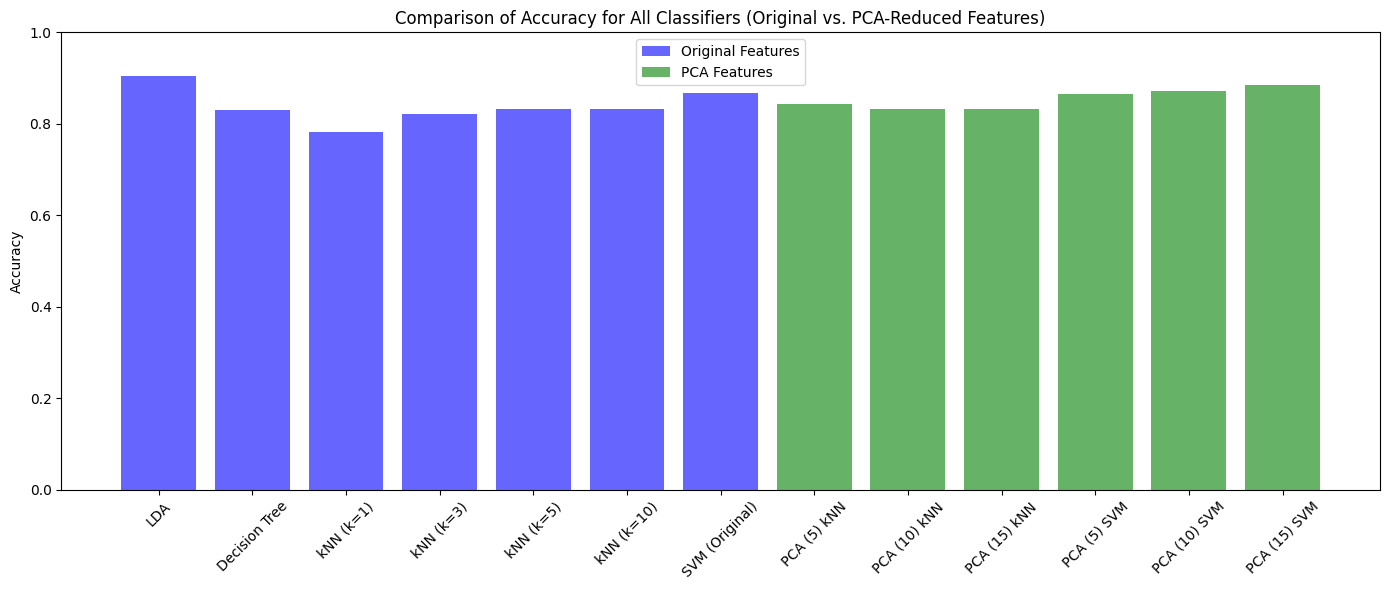

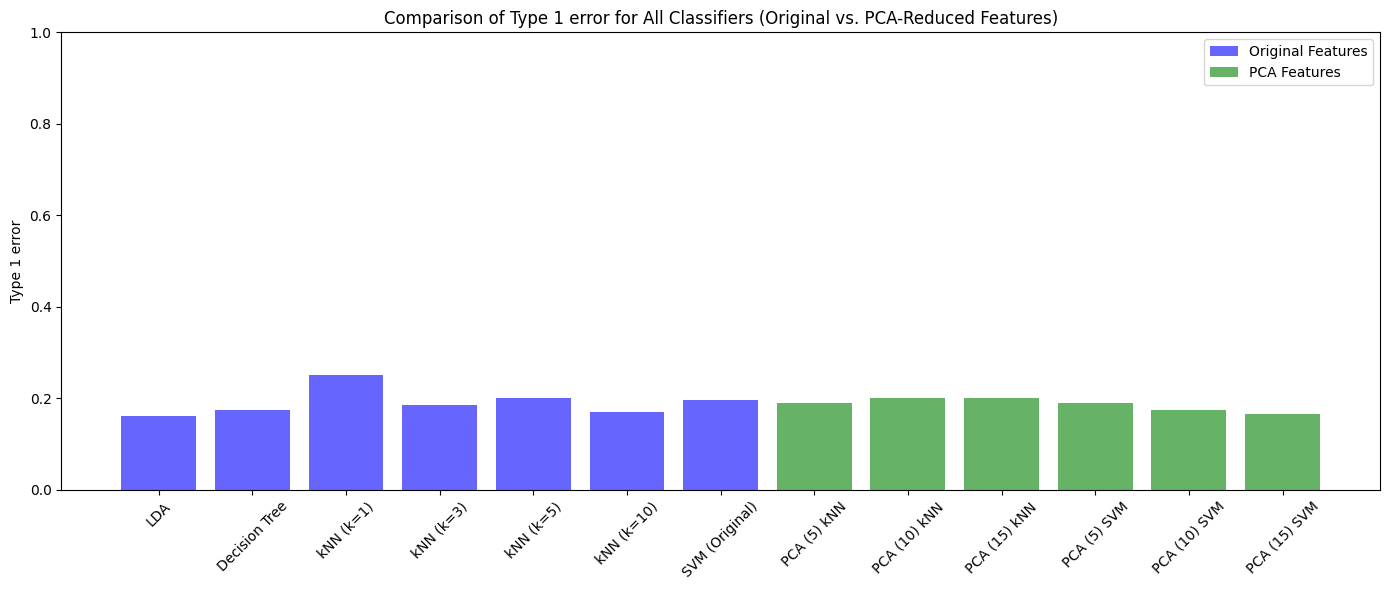

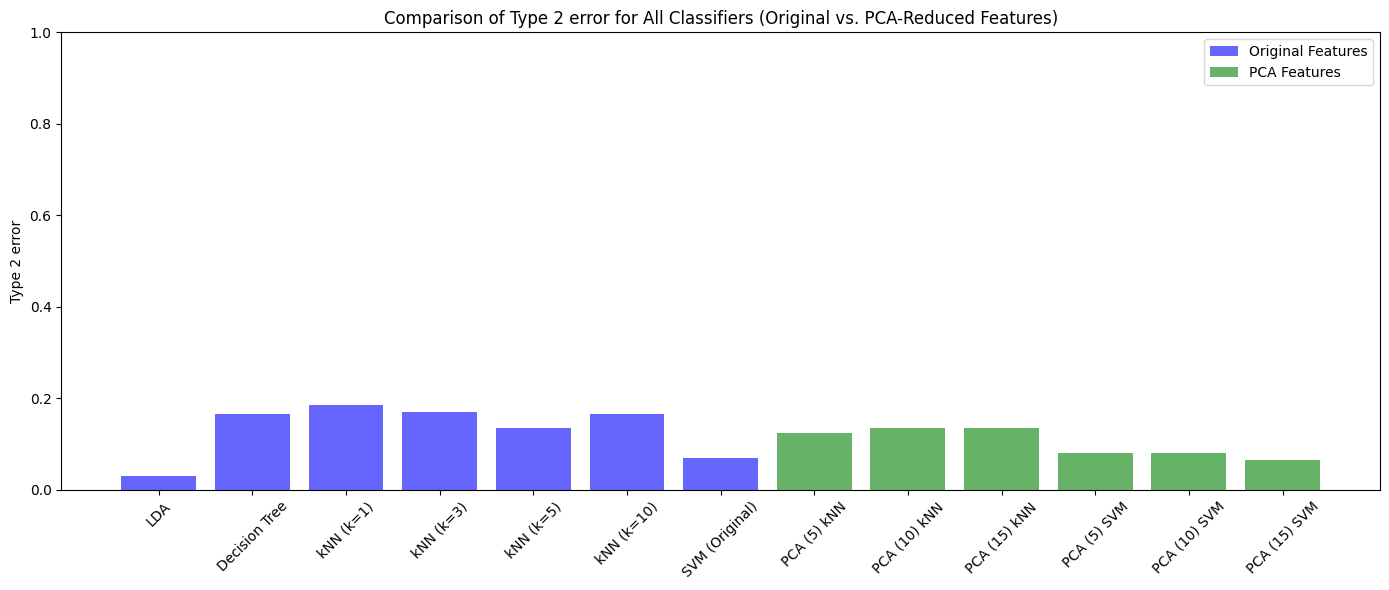

In [ ]:

# Printing summary for easy comparison
print("\n--- Summary: Original vs. PCA-Reduced Features ---")  # Print header for comparison
print("Original Features:")  # Label for original feature results
print(f"LDA Accuracy: {accuracy_lda:.2f}, Type 1 Error: {type_1_lda:.2f}, Type 2 Error: {type_2_lda:.2f}")  # Print LDA results
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}, Type 1 Error: {type_1_tree:.2f}, Type 2 Error: {type_2_tree:.2f}")  # Print Decision Tree results

# Loop through each k-value for kNN in Part 1 and print results
for k in [1, 3, 5, 10]:  # Loop through k-values 1, 3, 5, and 10 for kNN
    print(f"kNN (k={k}) Accuracy: {knn_results[k][2]:.2f}, Type 1 Error: {knn_results[k][0]:.2f}, Type 2 Error: {knn_results[k][1]:.2f}")  # Print kNN results for each k-value

print(f"SVM Accuracy: {accuracy_svm:.2f}, Type 1 Error: {type_1_svm:.2f}, Type 2 Error: {type_2_svm:.2f}")  # Print SVM results

# Print PCA results for kNN and SVM at each PCA component level
for K in [5, 10, 15]:  # Loop through PCA components 5, 10, and 15
    print(f"\nPCA with {K} Components:")  # Header for PCA with K components
    print(f"kNN (k=5) Accuracy: {pca_results[K]['kNN']['accuracy']:.2f}, "
          f"Type 1 Error: {pca_results[K]['kNN']['type_1_error']:.2f}, "
          f"Type 2 Error: {pca_results[K]['kNN']['type_2_error']:.2f}")  # Print kNN results with PCA-reduced features
    print(f"SVM Accuracy: {pca_results[K]['SVM']['accuracy']:.2f}, "
          f"Type 1 Error: {pca_results[K]['SVM']['type_1_error']:.2f}, "
          f"Type 2 Error: {pca_results[K]['SVM']['type_2_error']:.2f}")  # Print SVM results with PCA-reduced features

# Set up dictionaries to store accuracy, type 1 error, and type 2 error data for plotting
# Accuracy data for plotting
original_accuracies = {  # Dictionary for accuracies with original features
    'LDA': accuracy_lda,
    'Decision Tree': accuracy_tree,
    'kNN (k=1)': knn_results[1][2],
    'kNN (k=3)': knn_results[3][2],
    'kNN (k=5)': knn_results[5][2],
    'kNN (k=10)': knn_results[10][2],
    'SVM (Original)': accuracy_svm
}
pca_accuracies = {  # Dictionary for accuracies with PCA-reduced features
    'PCA (5) kNN': pca_results[5]['kNN']['accuracy'],
    'PCA (10) kNN': pca_results[10]['kNN']['accuracy'],
    'PCA (15) kNN': pca_results[15]['kNN']['accuracy'],
    'PCA (5) SVM': pca_results[5]['SVM']['accuracy'],
    'PCA (10) SVM': pca_results[10]['SVM']['accuracy'],
    'PCA (15) SVM': pca_results[15]['SVM']['accuracy']
}

# Type 1 Error data for plotting
original_type1_errors = {  # Dictionary for type 1 errors with original features
    'LDA': type_1_lda,
    'Decision Tree': type_1_tree,
    'kNN (k=1)': knn_results[1][0],
    'kNN (k=3)': knn_results[3][0],
    'kNN (k=5)': knn_results[5][0],
    'kNN (k=10)': knn_results[10][0],
    'SVM (Original)': type_1_svm
}
pca_type1_errors = {  # Dictionary for type 1 errors with PCA-reduced features
    'PCA (5) kNN': pca_results[5]['kNN']['type_1_error'],
    'PCA (10) kNN': pca_results[10]['kNN']['type_1_error'],
    'PCA (15) kNN': pca_results[15]['kNN']['type_1_error'],
    'PCA (5) SVM': pca_results[5]['SVM']['type_1_error'],
    'PCA (10) SVM': pca_results[10]['SVM']['type_1_error'],
    'PCA (15) SVM': pca_results[15]['SVM']['type_1_error']
}

# Type 2 Error data for plotting
original_type2_errors = {  # Dictionary for type 2 errors with original features
    'LDA': type_2_lda,
    'Decision Tree': type_2_tree,
    'kNN (k=1)': knn_results[1][1],
    'kNN (k=3)': knn_results[3][1],
    'kNN (k=5)': knn_results[5][1],
    'kNN (k=10)': knn_results[10][1],
    'SVM (Original)': type_2_svm
}
pca_type2_errors = {  # Dictionary for type 2 errors with PCA-reduced features
    'PCA (5) kNN': pca_results[5]['kNN']['type_2_error'],
    'PCA (10) kNN': pca_results[10]['kNN']['type_2_error'],
    'PCA (15) kNN': pca_results[15]['kNN']['type_2_error'],
    'PCA (5) SVM': pca_results[5]['SVM']['type_2_error'],
    'PCA (10) SVM': pca_results[10]['SVM']['type_2_error'],
    'PCA (15) SVM': pca_results[15]['SVM']['type_2_error']
}

# Plotting function for comparing metrics across classifiers
def plot_metric_comparison(metric_name, original_data, pca_data):
    """Plot a comparison of a specified metric across original and PCA-reduced features."""
    plt.figure(figsize=(14, 6))  # Set the figure size
    all_classifiers = list(original_data.keys()) + list(pca_data.keys())  # Combine classifier names

    # Plot original feature results as blue bars
    plt.bar(range(len(original_data)), list(original_data.values()), label='Original Features', color='blue', alpha=0.6)
    # Plot PCA-reduced feature results as green bars
    plt.bar(range(len(original_data), len(original_data) + len(pca_data)), list(pca_data.values()), label='PCA Features', color='green', alpha=0.6)

    # Set x-ticks with classifier names for both original and PCA-reduced features
    plt.xticks(range(len(original_data) + len(pca_data)), all_classifiers, rotation=45)
    plt.ylabel(metric_name.capitalize())  # Label y-axis with the metric name
    plt.title(f"Comparison of {metric_name.capitalize()} for All Classifiers (Original vs. PCA-Reduced Features)")  # Title for the plot
    plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for consistent scaling
    plt.legend()  # Add legend for differentiation between original and PCA features
    plt.tight_layout()  # Adjust layout for readability
    plt.show()  # Display the plot

# Plot comparisons for accuracy, type 1 error, and type 2 error
plot_metric_comparison('accuracy', original_accuracies, pca_accuracies)  # Plot accuracy comparison
plot_metric_comparison('type 1 error', original_type1_errors, pca_type1_errors)  # Plot type 1 error comparison
plot_metric_comparison('type 2 error', original_type2_errors, pca_type2_errors)  # Plot type 2 error comparison
